In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

G = 6.6743E-11

In [2]:
def findAcceleration(N, r, m):
    a = np.zeros((N, 3))
    for i in range(len(m)):
        for j in range(N):
            if (i != j):
                a[i] = G*m[j]*(r[j] - r[i]) / np.linalg.norm(r[j] - r[i])**3
    return a

def f_true(r, v, m, delta_t):
    N = 3
    acceleration_vec = findAcceleration(N, r, m)
    u_dot_r = v
    u_dot_v = acceleration_vec
    return u_dot_r, u_dot_v

def RK4(r, v, m, delta_t):
    k1_r, k1_v = f_true(r, v, m, delta_t)
    k2_r, k2_v = f_true(r + 0.5*k1_r, v + 0.5*k1_v, m, delta_t)
    k3_r, k3_v = f_true(r + 0.5*k2_r, v + 0.5*k2_v, m, delta_t)
    k4_r, k4_v = f_true(r + k3_r, v + k3_v, m, delta_t)
    return r + (delta_t / 6) * (k1_r + 2*k2_r + 2*k3_r + k4_r), v + (delta_t / 6) * (k1_v + 2*k2_v + 2*k3_v + k4_v)

m_vec = np.array([1.9891*10**30, 6.39*10**23, 10.6*10**15])      # sun, mars, phobos

x_sun = np.array([0, 0, 0])
x_mars = np.array([-1.452225829003665E+08, 1.982282617940946E+08, 7.716734755059928E+06])
x_phobos = np.array([-1.452162997749086E+08, 1.982346674348103E+08, 7.713809702492163E+06])
x_vec = np.array([x_sun, x_mars, x_phobos])

v_sun = np.array([0, 0, 0])
v_mars = np.array([-1.863015592458860E+01,-1.225724886921267E+01, 2.001015393882497E-01])
v_phobos = np.array([-1.989472584067270E+01, -1.072067660202062E+01, 9.414140308600949E-01])
v_vec = np.array([v_sun, v_mars, v_phobos])

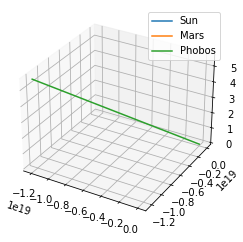

In [3]:
def orbit(x0, v0, m, t, dt):
    x = np.zeros((int(t/dt) + 1, *x0.shape))
    v = np.zeros((int(t/dt) + 1, *v0.shape))
    x[0] = x0
    v[0] = v0
    for i in range(int(t/dt)):
        x[i+1], v[i+1] = RK4(x[i], v[i], m, dt)
    return x, v

t = 2628000*12 #seconds in a year
dt = 2628000 #seconds in a month
x, v = orbit(x_vec, v_vec, m_vec, t, dt)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(x[:,0,0], x[:,0,1], x[:,0,2], label='Sun')
ax.plot(x[:,1,0], x[:,1,1], x[:,1,2], label='Mars')
ax.plot(x[:,2,0], x[:,2,1], x[:,2,2], label='Phobos')
ax.legend()
plt.show()

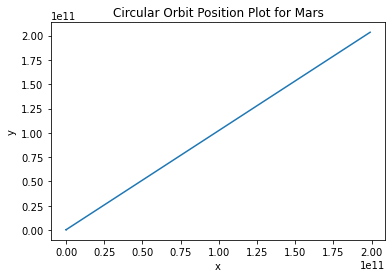

In [4]:
fig2, ax2 = plt.subplots()
ax2.plot(x[:,1,0], x[:,1,1])
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_title('Circular Orbit Position Plot for Mars')
plt.show()